In [1]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
from util import *
from loss import *
from Estimator import *
from cluster import *
import matplotlib.pyplot as plt

### Complete graph

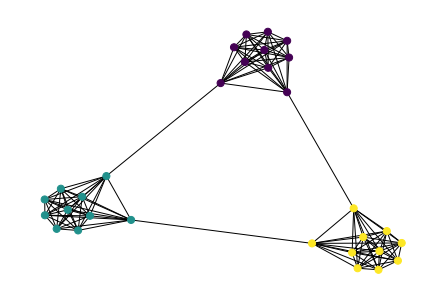

In [2]:
list_shapes = ['nx.complete_graph'] * 3
list_shapes_args = [[10]]*3
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [3, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
L, D, Gamma = graph_to_mat(G)

In [3]:
U, latent_features, node_features = sub_noisy_feature_generator(group_label, num_features=20, num_latent_features=8, standard_basis=False)

#### Matrix Fatorization method

<AxesSubplot:>

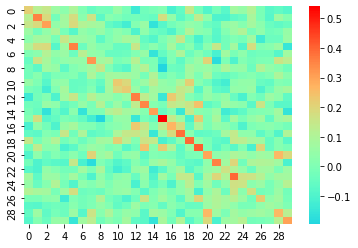

In [4]:
from numpy.linalg import svd
V = svd(node_features.T)
W0 = V[2].T[:,:8] @ V[2].T[:,:8].T
sb.heatmap(W0, cmap='rainbow', center=0)

#### Low rank loss

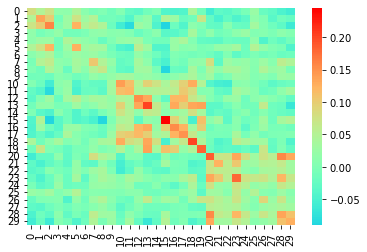

In [5]:
lr = LR_Estimator(l3=100, method='cp', solver='SCS')
lr.fit(node_features, maxiter=1000)
lr.heatplot()

#### SymmetricElast

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


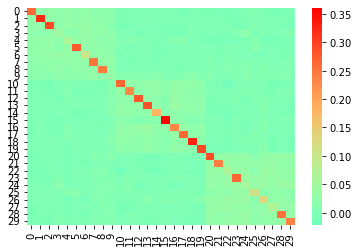

In [6]:
see = ss_El_Estimator(l1=10, l2=10, l3=10, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
see.fit(node_features, maxiter=200)
see.heatplot()

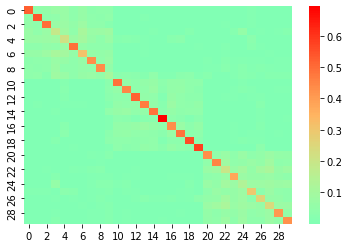

In [7]:
see.scaling()

#### AsymmetricElast

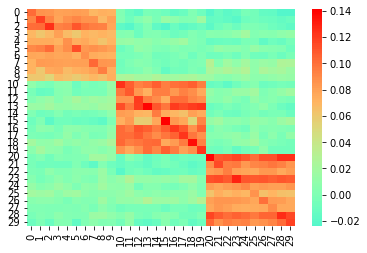

In [8]:
see = as_El_Estimator(l1=10, l2=10, l3=10, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
see.fit(node_features, maxiter=200)
see.heatplot()

### Star graph

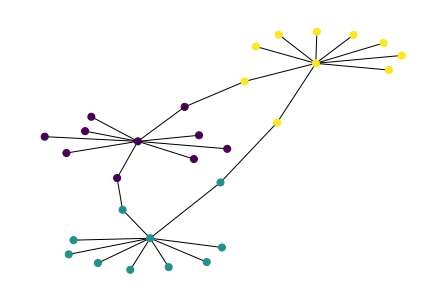

In [9]:
list_shapes = ['nx.star_graph'] * 3
list_shapes_args = [[9]]*3
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [3, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
L, D, Gamma = graph_to_mat(G)

#### Matrix Factorizaion

<AxesSubplot:>

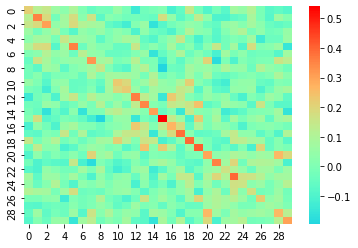

In [10]:
from numpy.linalg import svd
V = svd(node_features.T)
W0 = V[2].T[:,:8] @ V[2].T[:,:8].T
sb.heatmap(W0, cmap='rainbow', center=0)

#### Low rank loss

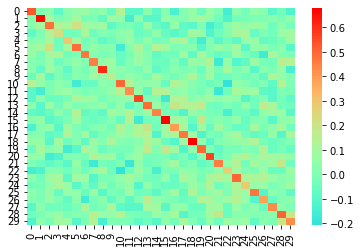

In [11]:
lr = LR_Estimator(l3=10, method='cp', solver='SCS')
lr.fit(node_features, maxiter=1000)
lr.heatplot()

#### Symmetric Elast

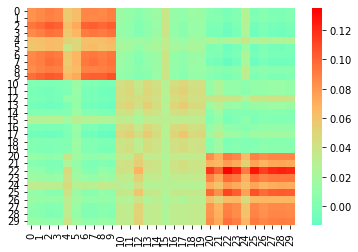

In [12]:
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8, standard_basis=False)
see = as_El_Estimator(l1=100, l2=100, l3=10, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
see.fit(node_features, maxiter=200)
see.heatplot()

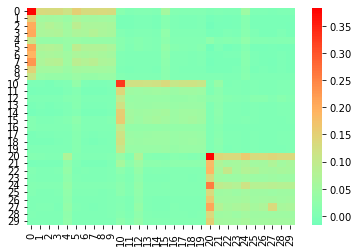

In [13]:
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8, standard_basis=False)
see = as_El_Estimator(l1=10, l2=10, l3=10, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
see.fit(node_features, maxiter=200)
see.heatplot()